**Importing the necessary libraries**

In [24]:
# open cv for image processing and importing 
import cv2

# for visualizing the images 
import matplotlib.pyplot as plt
%matplotlib inline

**We can now import the main harrcascade xml file that actually has the pre-trained model.**

In [25]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

**Now that we have the model we just have to make a function to make a rectangle where it detects a face.**

The steps we will follow are:
1. Make a copy of the image.
2. use the **detectMultiScale** to detect the face with few arguments that are:
    * the actual image.
    
    * minNeighbors : How many neighbours each window should have for the area in the window to be considered a face. This parameter controls how many rectangles (neighbours) need to be detected for the window to be labelled a face.
    
    * scaleFactor : The value is used to scale pyramid to detect faces at multiple scales in the image.

3. At this point we have all the points for all the faces detected by the classifier in the image as tuples.
4. Now we iterate through each of the tuples and 
5. make a rectange using these points in the tuples with color white and thickness 4.
6. Finally, we return the new image with the rectangles made on top of detected faces.

In [26]:
def face_detection(img):
    
    # make a copy of the image
    face = img.copy()
    
    # the main detection line
    face_rect = face_cascade.detectMultiScale(img, minNeighbors=5, scaleFactor=1.2)
    
    for (x,y,w,h) in face_rect:
        
        cv2.rectangle(face, (x,y), (x+w, y+h), (255,255,255), 4)

    return face
    

**Now we have all the things we need to detect the faces on any image. But we still need a function to do some more work for us.**

1. Since we are importing the image using cv2, we have to color correct it to be RGB as it is imported as BGR by default.
2. Show the original image on the left side of the 2 images.
3. Pass it to the detection function.
4. Show this new detected image to the right of the original image.

In [27]:
def img_face_detection(img):
    
    # color convert it
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #make the images to be side by side in subplot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
    
    # see the image
    ax[0].imshow(img)
    ax[0].title.set_text("Original")
    
    # pass it to the detection function
    result = face_detection(img)
    
    # visualize the resultant image
    ax[1].imshow(result)
    ax[1].title.set_text("Detected")

# The actual detection.

We follow a few steps when detecting the face on a image.

1. Import the image using cv2 using the path to the image. 
2. Pass it to the function, and we are done.


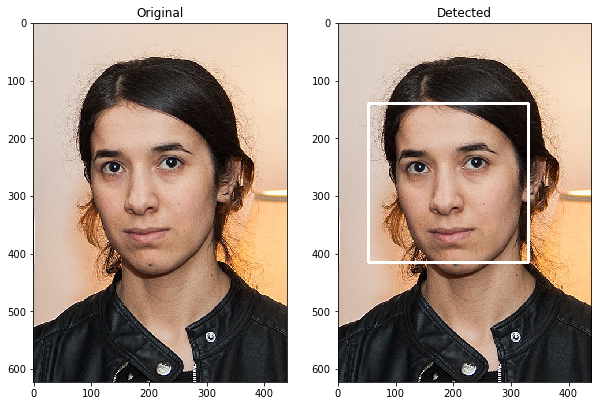

In [28]:
image = cv2.imread("sample images/1.jpg")
img_face_detection(image)

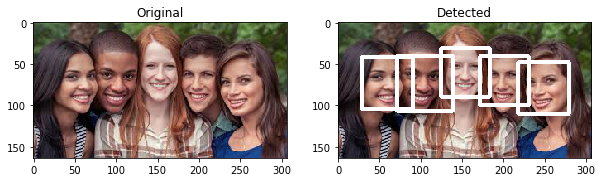

In [15]:
image = cv2.imread("sample images/2.jpg")
img_face_detection(image)

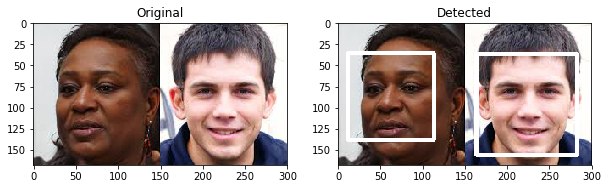

In [13]:
image = cv2.imread("sample images/3.jpg")
img_face_detection(image)

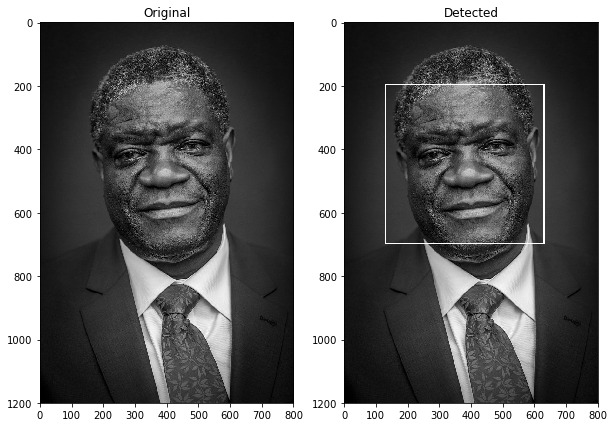

In [18]:
image = cv2.imread("sample images/4.jpg")
img_face_detection(image)

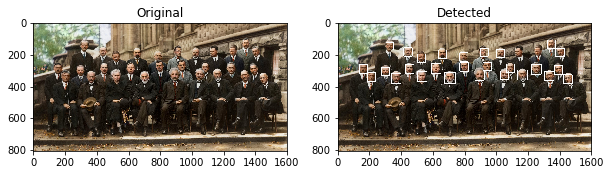

In [19]:
image = cv2.imread("sample images/5.jpg")
img_face_detection(image)

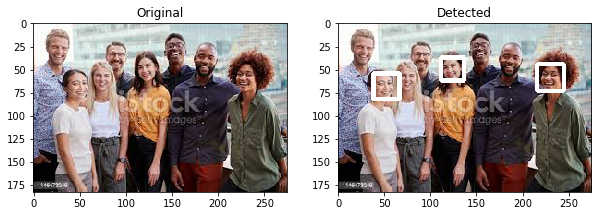

In [21]:
image = cv2.imread("sample images/6.jpg")
img_face_detection(image)

**As we can see it is not very accurate with faces that are not directly looking at the camera.**

# Thank you.